<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/FRED_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install fredapi >/dev/null

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.set_option('display.max_columns' , 200)
from fredapi import Fred
color = plt.rcParams['axes.prop_cycle'].by_key()['color']
fred_key = '7ed296306cad5c20c6961ccb305d203c'

In [16]:
fred=Fred(api_key=fred_key)

In [34]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-04,2023-11-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 09:07:01-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-04,2023-11-04,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-04,2023-11-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 09:07:08-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-11-04,2023-11-04,S&P 500,2013-11-04,2023-11-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-03 19:11:03-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-11-04,2023-11-04,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDM02MUA156NWDB,DDDM02MUA156NWDB,2023-11-04,2023-11-04,Stock Market Total Value Traded to GDP for Mau...,1993-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:32:15-05:00,3,Total value of all traded shares in a stock ma...
DDEM01ECA156NWDB,DDEM01ECA156NWDB,2023-11-04,2023-11-04,Stock Market Turnover Ratio (Value Traded/Capi...,1995-01-01,2000-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:42-05:00,3,Total value of shares traded during the period...
DDEM01TTA156NWDB,DDEM01TTA156NWDB,2023-11-04,2023-11-04,Stock Market Turnover Ratio (Value Traded/Capi...,2000-01-01,2001-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:40-05:00,3,Total value of shares traded during the period...


In [35]:
sp_search.columns

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')

In [41]:
S_P =fred.search('S&P',order_by='popularity')

In [44]:
S_P.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-04,2023-11-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 09:07:01-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-04,2023-11-04,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-04,2023-11-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 09:07:08-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-11-04,2023-11-04,S&P 500,2013-11-04,2023-11-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-03 19:11:03-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-11-04,2023-11-04,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


In [46]:
sp500 =fred.get_series('SP500')

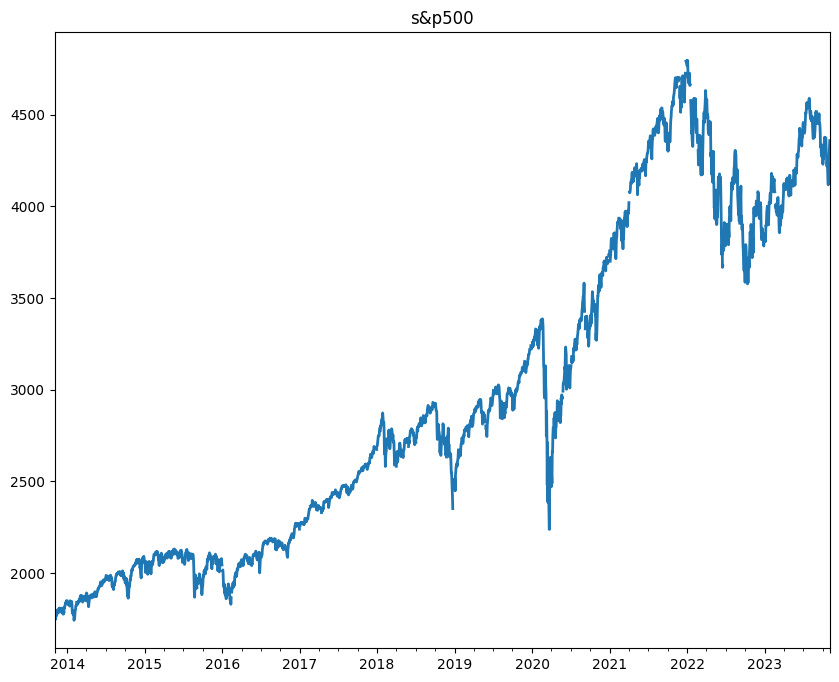

In [58]:
sp500.plot(figsize= (10,8), title = 's&p500'  , lw = 2)
plt.show()

In [63]:
Unemployment_rate =fred.search(' Unemployment Rate')
Unemployment_rate

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-04,2023-11-04,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-11-04,2023-11-04,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 07:50:14-05:00,57,The unemployment rate represents the number of...
NROU,NROU,2023-11-04,2023-11-04,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,68,"Starting with the July, 2021 report: An Update..."
LNS14000006,LNS14000006,2023-11-04,2023-11-04,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:06-05:00,67,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-11-04,2023-11-04,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 07:50:35-05:00,22,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RIVE106URN,RIVE106URN,2023-11-04,2023-11-04,Unemployment Rate in Riverside-San Bernardino-...,1990-01-01,2023-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-01 10:23:10-05:00,5,None
FORT608URN,FORT608URN,2023-11-04,2023-11-04,"Unemployment Rate in Fort Collins, CO (MSA)",1990-01-01,2023-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-01 10:20:03-05:00,5,None
RAPI646UR,RAPI646UR,2023-11-04,2023-11-04,"Unemployment Rate in Rapid City, SD (MSA)",1990-01-01,2023-09-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-11-01 13:31:33-05:00,5,None


In [74]:
un_rate= fred.get_series('UNRATE')
#un_rate.plot(figsize= (10,8))

In [73]:
un_rate


1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Length: 910, dtype: float64

In [91]:
unemployment_df =fred.search('unemployment rate state' , filter = ('frequency','Monthly'))

In [98]:
unemployment_df_seasonal_adjusted =unemployment_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent' ")

In [114]:
unemployment_df_state =unemployment_df_seasonal_adjusted.loc[unemployment_df_seasonal_adjusted['title'].str.contains('Unemployment Rate in')]

In [108]:
unemployment_df_seasonal_adjusted['title']

series id
UNRATE                                         Unemployment Rate
LNS14000006        Unemployment Rate - Black or African American
U6RATE         Total Unemployed, Plus All Persons Marginally ...
CAUR                             Unemployment Rate in California
TXUR                                  Unemployment Rate in Texas
                                     ...                        
LNS14000029      Unemployment Rate - 20 Yrs. & over, White Women
LNS14024232            Unemployment Rate - 55 Yrs. & over, Women
LNS14000315                    Unemployment Rate - Married Women
LNS14100000                  Unemployment Rate Full-Time Workers
LNS14000327                Unemployment Rate - 25-34 Yrs., Women
Name: title, Length: 167, dtype: object

In [115]:
unemployment_df =fred.search('unemployment rate state' , filter = ('frequency','Monthly'))
unemployment_df_seasonal_adjusted =unemployment_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent' ")
unemployment_df_state =unemployment_df_seasonal_adjusted.loc[unemployment_df_seasonal_adjusted['title'].str.contains('Unemployment Rate in')]

In [117]:
unemployment_df_state

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-11-05,2023-11-05,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,61,None
TXUR,TXUR,2023-11-05,2023-11-05,Unemployment Rate in Texas,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:02-05:00,55,None
NYUR,NYUR,2023-11-05,2023-11-05,Unemployment Rate in New York,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:03-05:00,52,None
FLUR,FLUR,2023-11-05,2023-11-05,Unemployment Rate in Florida,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:04-05:00,50,None
OHUR,OHUR,2023-11-05,2023-11-05,Unemployment Rate in Ohio,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:03-05:00,41,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNERUR,CNERUR,2023-11-05,2023-11-05,Unemployment Rate in Northeast Census Region,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:15-05:00,2,None
CWSTUR,CWSTUR,2023-11-05,2023-11-05,Unemployment Rate in West Census Region,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:12-05:00,5,None
USAURAMS,USAURAMS,2023-11-05,2023-11-05,Unemployment Rate in the United States (DISCON...,2007-01-01,2013-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2013-09-03 11:06:07-05:00,1,Bureau of Labor Statistics (BLS) has eliminate...


In [120]:
len(unemployment_df.index)

1000

In [121]:
len(unemployment_df_state)

61

In [152]:
#unemployment_df_state.index
unemployment_df_state

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-11-05,2023-11-05,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,61,None
TXUR,TXUR,2023-11-05,2023-11-05,Unemployment Rate in Texas,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:02-05:00,55,None
NYUR,NYUR,2023-11-05,2023-11-05,Unemployment Rate in New York,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:03-05:00,52,None
FLUR,FLUR,2023-11-05,2023-11-05,Unemployment Rate in Florida,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:04-05:00,50,None
OHUR,OHUR,2023-11-05,2023-11-05,Unemployment Rate in Ohio,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:03-05:00,41,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNERUR,CNERUR,2023-11-05,2023-11-05,Unemployment Rate in Northeast Census Region,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:15-05:00,2,None
CWSTUR,CWSTUR,2023-11-05,2023-11-05,Unemployment Rate in West Census Region,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:12-05:00,5,None
USAURAMS,USAURAMS,2023-11-05,2023-11-05,Unemployment Rate in the United States (DISCON...,2007-01-01,2013-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2013-09-03 11:06:07-05:00,1,Bureau of Labor Statistics (BLS) has eliminate...


In [142]:

all_result = []

for myid in unemployment_df_state.index:
  results = fred.get_series(myid)

  results = results.to_frame( name = myid)
  all_result.append(results)



In [141]:
results.to_frame( name = myid)

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2023-05-01,4.5
2023-06-01,4.6
2023-07-01,4.6
2023-08-01,4.6


In [146]:
all_result[4]

,OHUR
1976-01-01,8.1
1976-02-01,8.1
1976-03-01,8.1
1976-04-01,8.0
1976-05-01,7.8
...,...
2023-05-01,3.6
2023-06-01,3.4
2023-07-01,3.3
2023-08-01,3.4


In [163]:
unemply_result =pd.concat(all_result , axis = 1).drop(['LASMT261982000000003','LASMT391746000000003', 'USAURAMS' ,'CNEWUR' , 'CSATUR' , 'CMWRUR', 'CSOUUR', 'CWSTUR' ,'USAURAMS' , 'CNERUR' ,] , axis = 1)

In [165]:
un_employ_US= unemply_result.dropna()

In [183]:
un_employ_US.drop('PRUR', axis = 1, inplace = True)
px.line(un_employ_US)

<ipython-input-183-be5016a0b5d5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



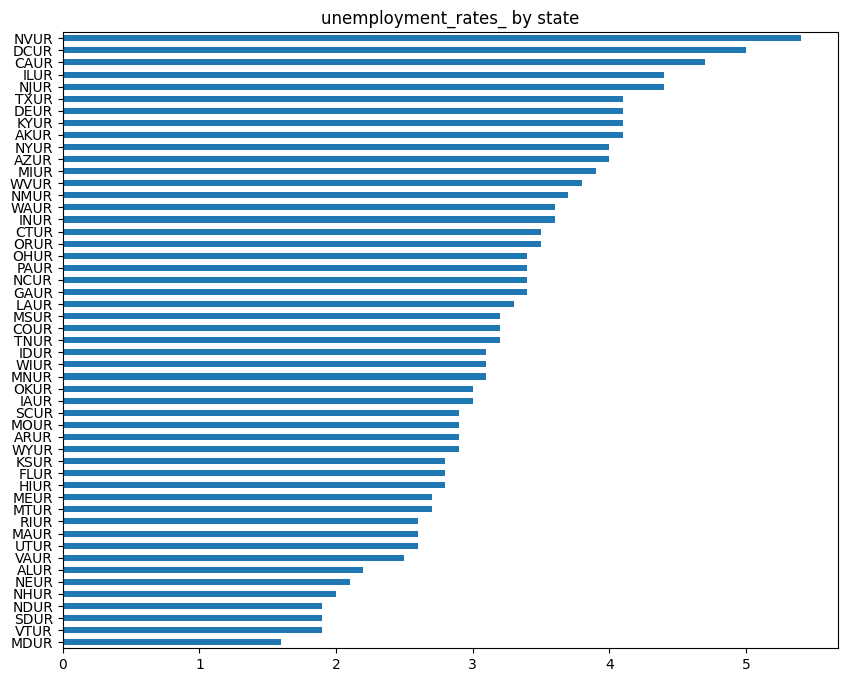

In [189]:
ax = un_employ_US.loc[un_employ_US.index == '2023-09-01'].T.sort_values('2023-09-01') \
.plot(kind = 'barh',  figsize = (10,8) , title = 'unemployment_rates_ by state')
ax.legend().remove()




In [199]:
id_to_state =unemployment_df_state['title'].str.replace('Unemployment Rate in',' ').to_dict()

In [203]:
un_employ_US.columns=[id_to_state[c] for c in un_employ_US.columns]

In [204]:
un_employ_US

,California,Texas,New York,Florida,Ohio,Alabama,Kentucky,Michigan,Pennsylvania,Illinois,Massachusetts,North Carolina,Colorado,Georgia,Tennessee,Wisconsin,Minnesota,Arizona,Washington,Alaska,Virginia,New Jersey,Oregon,New Mexico,North Dakota,Indiana,South Carolina,Missouri,Arkansas,Iowa,Maryland,Utah,Hawaii,West Virginia,Oklahoma,Louisiana,Kansas,Rhode Island,Nevada,Mississippi,Connecticut,Nebraska,Montana,Idaho,New Hampshire,Maine,the District of Columbia,Delaware,Wyoming,South Dakota,Vermont
1976-01-01,9.2,5.8,10.3,9.7,8.1,6.6,5.6,9.9,8.0,6.6,10.5,6.4,5.8,8.4,6.0,5.8,6.0,10.2,8.5,7.1,6.1,10.3,9.5,8.6,3.4,6.6,7.4,5.9,7.3,4.3,6.4,5.8,9.8,7.5,5.8,6.3,4.2,7.8,9.2,6.7,9.8,3.3,5.8,5.6,6.5,8.7,8.7,8.0,4.1,3.3,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,6.6,5.6,9.9,8.1,6.6,10.5,6.4,5.7,8.4,6.0,5.8,6.0,10.2,8.5,7.1,6.1,10.3,9.5,8.7,3.4,6.6,7.4,5.9,7.3,4.3,6.4,5.9,9.8,7.5,5.8,6.3,4.2,7.8,9.2,6.7,9.8,3.3,5.8,5.6,6.5,8.7,8.7,8.0,4.1,3.3,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,6.6,5.6,9.9,8.1,6.6,10.5,6.4,5.7,8.4,6.0,5.7,5.9,10.1,8.4,7.0,6.1,10.3,9.4,8.7,3.4,6.5,7.3,5.9,7.3,4.3,6.4,5.8,9.8,7.5,5.8,6.3,4.2,7.7,9.2,6.6,9.8,3.3,5.8,5.6,6.5,8.6,8.6,8.0,4.1,3.2,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.0,6.5,5.6,9.8,8.1,6.6,10.3,6.3,5.6,8.3,6.0,5.6,5.8,10.0,8.5,6.9,6.0,10.3,9.2,8.6,3.5,6.3,7.2,6.0,7.2,4.2,6.4,5.8,9.7,7.5,5.8,6.4,4.2,7.7,9.0,6.4,9.6,3.2,5.8,5.6,6.5,8.6,8.5,8.1,4.0,3.1,8.6
1976-05-01,9.0,5.9,10.1,9.3,7.8,6.4,5.5,9.6,8.1,6.6,10.1,6.1,5.6,8.1,5.9,5.5,5.7,9.8,8.5,6.9,5.9,10.3,9.1,8.6,3.6,6.0,7.0,6.0,7.1,4.1,6.5,5.7,9.4,7.4,5.7,6.5,4.2,7.7,8.9,6.3,9.4,3.1,5.8,5.6,6.5,8.5,8.4,8.3,3.9,3.1,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,4.5,4.1,3.9,2.6,3.6,2.2,3.8,3.7,4.0,4.1,2.8,3.4,2.8,3.2,3.3,2.4,2.9,3.4,4.1,3.6,2.9,3.6,3.7,3.5,2.1,3.1,3.1,2.5,2.7,2.7,2.4,2.3,3.1,3.3,2.8,3.6,2.9,3.0,5.4,3.2,3.7,1.9,2.3,2.6,1.9,2.4,5.1,4.2,3.3,1.9,2.1
2023-06-01,4.6,4.1,3.9,2.6,3.4,2.2,3.8,3.6,3.8,4.0,2.6,3.3,2.8,3.2,3.2,2.5,2.9,3.5,3.8,3.7,2.7,3.7,3.5,3.5,2.0,3.2,3.1,2.6,2.6,2.7,2.0,2.4,3.0,3.3,2.7,3.6,2.8,2.9,5.4,3.1,3.7,1.9,2.4,2.7,1.8,2.4,5.1,4.2,3.1,1.8,1.9
2023-07-01,4.6,4.1,3.9,2.7,3.3,2.1,3.9,3.6,3.5,4.0,2.5,3.3,2.9,3.2,3.1,2.6,3.0,3.6,3.6,3.8,2.5,3.9,3.4,3.6,2.0,3.3,3.1,2.7,2.6,2.7,1.8,2.4,2.8,3.4,2.7,3.4,2.7,2.8,5.3,3.0,3.6,2.0,2.5,2.8,1.7,2.4,5.0,4.1,3.0,1.9,1.8
2023-08-01,4.6,4.1,3.9,2.7,3.4,2.1,4.0,3.7,3.5,4.1,2.6,3.3,3.1,3.3,3.1,2.9,3.1,3.8,3.6,3.9,2.5,4.2,3.4,3.7,1.9,3.4,3.0,2.8,2.7,2.9,1.7,2.5,2.8,3.6,2.8,3.3,2.7,2.7,5.4,3.2,3.5,2.0,2.5,3.0,1.8,2.5,5.0,4.1,2.9,1.9,1.8


In [206]:
px.line(un_employ_US)

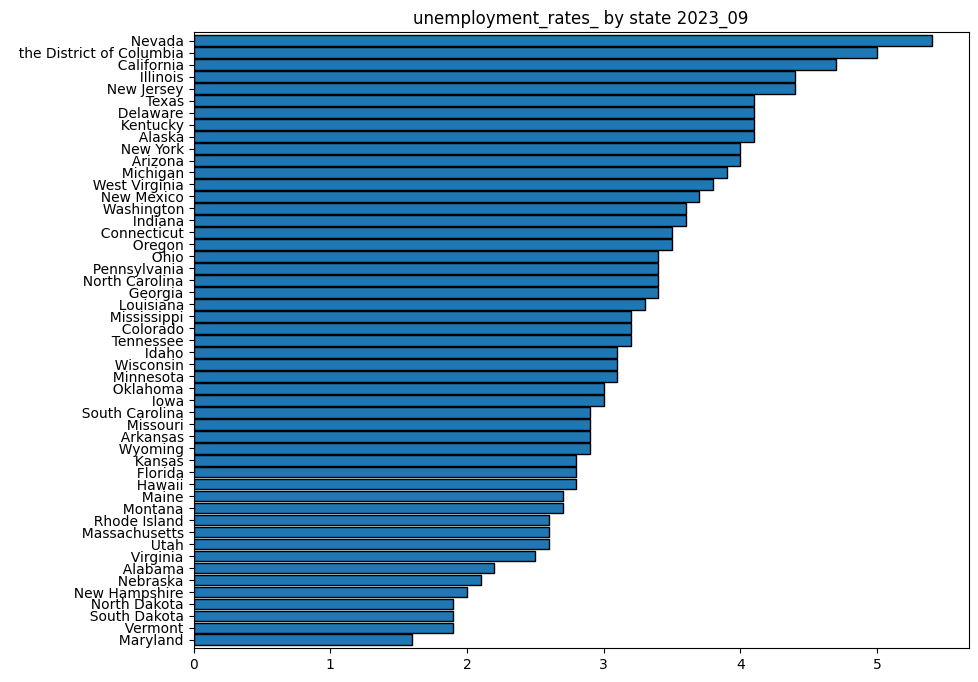

In [212]:
ax = un_employ_US.loc[un_employ_US.index == '2023-09-01'].T.sort_values('2023-09-01') \
.plot(kind = 'barh',  figsize = (10,8) , title = 'unemployment_rates_ by state 2023_09' , width = .9 , edgecolor = 'black')
ax.legend().remove()

In [ ]:
Participation_df

In [232]:
Participation_df =fred.search('Participation rate state ' , filter = ('frequency','Monthly'))
Participation_df
Participation_df=Participation_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent' ")
Participation_df =Participation_df.loc[Participation_df['title'].str.contains('Labor Force Participation Rate for ')]

In [246]:
Participation_df.shape

(51, 15)

In [248]:
part_id_state_name =Participation_df['title'].str.replace('Labor Force Participation Rate for',' ').to_dict()

In [250]:
Participation_df['title'].str.replace('Labor Force Participation Rate for',' ').to_dict()

all_result = []

for myid in Participation_df .index:
  results = fred.get_series(myid)

  results = results.to_frame( name = myid)
  all_result.append(results)


In [259]:
part_states = pd.concat(all_result , axis = 1 )

In [275]:
part_states.columns = [part_id_state_name[c] for c in part_states.columns]

In [276]:
part_states.columns

Index(['  Alabama', '  Kentucky', '  California', '  Michigan', '  Wisconsin',
       '  Florida', '  Maryland', '  New York', '  Texas', '  Minnesota',
       '  Tennessee', '  Ohio', '  Georgia', '  Massachusetts', '  Colorado',
       '  Washington', '  Virginia', '  North Carolina', '  Maine',
       '  Pennsylvania', '  Louisiana', '  Connecticut', '  South Carolina',
       '  Utah', '  West Virginia', '  Mississippi', '  Illinois',
       '  Missouri', '  Oregon', '  Alaska', '  Vermont', '  Arkansas',
       '  New Mexico', '  New Hampshire', '  Rhode Island', '  Idaho',
       '  Indiana', '  Iowa', '  Arizona', '  Oklahoma', '  New Jersey',
       '  Nebraska', '  South Dakota', '  Hawaii', '  Kansas',
       '  North Dakota', '  District Of Columbia', '  Nevada', '  Montana',
       '  Wyoming', '  Delaware'],
      dtype='object')

In [277]:
part_states

,Alabama,Kentucky,California,Michigan,Wisconsin,Florida,Maryland,New York,Texas,Minnesota,Tennessee,Ohio,Georgia,Massachusetts,Colorado,Washington,Virginia,North Carolina,Maine,Pennsylvania,Louisiana,Connecticut,South Carolina,Utah,West Virginia,Mississippi,Illinois,Missouri,Oregon,Alaska,Vermont,Arkansas,New Mexico,New Hampshire,Rhode Island,Idaho,Indiana,Iowa,Arizona,Oklahoma,New Jersey,Nebraska,South Dakota,Hawaii,Kansas,North Dakota,District Of Columbia,Nevada,Montana,Wyoming,Delaware
1976-01-01,57.0,60.5,62.6,61.6,65.6,55.8,64.3,58.0,63.8,65.6,59.6,61.7,63.7,64.8,67.2,60.9,65.9,66.5,62.1,58.4,56.8,64.2,65.3,62.8,52.5,58.8,63.0,60.5,62.9,69.0,63.6,57.9,60.8,65.9,63.8,63.0,64.0,64.4,59.5,59.3,61.5,64.9,64.6,69.9,65.1,62.6,64.4,71.3,62.7,65.3,62.7
1976-02-01,56.9,60.3,62.4,61.5,65.5,55.7,64.2,58.0,63.5,65.5,59.4,61.7,63.6,64.7,67.0,60.7,65.8,66.3,61.9,58.3,56.6,64.1,65.2,62.6,52.4,58.6,63.0,60.3,62.7,68.4,63.4,57.8,60.5,65.6,63.7,62.8,63.9,64.3,59.2,59.2,61.4,64.9,64.4,69.6,65.0,62.4,64.5,70.8,62.5,64.9,62.5
1976-03-01,56.8,60.2,62.2,61.5,65.4,55.5,64.1,58.0,63.4,65.4,59.3,61.7,63.5,64.6,66.8,60.6,65.6,66.2,61.9,58.3,56.5,64.0,65.0,62.5,52.3,58.5,62.9,60.3,62.5,67.8,63.2,57.7,60.3,65.6,63.6,62.7,63.8,64.2,59.1,59.1,61.4,64.8,64.4,69.6,64.9,62.3,64.5,70.5,62.4,64.7,62.5
1976-04-01,56.8,60.1,62.2,61.6,65.4,55.5,64.1,58.0,63.5,65.4,59.3,61.6,63.5,64.6,66.6,60.6,65.5,66.2,61.8,58.3,56.4,64.1,64.9,62.5,52.3,58.5,62.9,60.4,62.4,67.9,63.5,57.7,60.3,65.7,63.7,62.7,63.8,64.1,59.1,59.0,61.5,64.8,64.3,69.4,65.0,62.5,64.5,70.4,62.3,64.9,62.4
1976-05-01,56.8,60.1,62.3,61.7,65.5,55.4,64.1,58.1,63.6,65.5,59.4,61.6,63.6,64.6,66.5,60.7,65.4,66.3,61.7,58.3,56.4,64.3,64.7,62.6,52.2,58.5,63.0,60.6,62.5,67.9,63.6,57.7,60.3,66.0,63.6,62.8,63.9,64.1,59.1,59.0,61.6,64.8,64.3,69.3,65.1,62.6,64.4,70.5,62.2,65.2,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,56.9,57.7,62.5,60.5,65.1,59.4,65.3,61.0,64.2,68.2,59.2,62.1,61.3,64.7,68.7,64.8,66.5,60.6,58.3,62.0,59.6,64.2,56.5,69.4,54.6,54.6,64.7,63.4,62.2,65.3,63.7,57.5,56.9,65.3,63.1,62.5,63.6,68.5,61.7,61.3,65.2,69.5,67.8,60.4,66.8,69.7,70.8,61.5,62.8,64.6,59.9
2023-06-01,57.0,57.8,62.5,60.7,65.3,59.5,65.3,61.2,64.2,68.4,59.3,62.2,61.3,64.6,68.7,64.7,66.6,60.7,58.4,62.0,59.5,64.1,56.7,69.6,54.6,54.5,64.6,63.6,62.0,65.3,63.8,57.6,57.0,65.2,63.2,62.5,63.6,68.7,61.7,61.4,65.4,69.5,67.9,60.4,66.8,69.7,70.8,61.5,62.8,64.6,60.0
2023-07-01,57.0,57.7,62.4,61.0,65.5,59.7,65.3,61.4,64.2,68.5,59.4,62.1,61.4,64.5,68.7,64.7,66.7,60.7,58.5,61.9,59.3,64.1,56.9,69.8,54.7,54.4,64.4,63.6,61.8,65.2,63.9,57.7,57.1,64.9,63.3,62.4,63.6,68.8,61.8,61.6,65.5,69.4,67.8,60.3,66.8,69.7,70.8,61.6,62.7,64.6,60.1
2023-08-01,57.0,57.6,62.4,61.3,65.7,59.7,65.3,61.5,64.2,68.5,59.4,62.1,61.4,64.5,68.7,64.6,66.7,60.8,58.6,61.9,59.0,64.1,57.0,69.8,54.9,54.3,64.4,63.7,61.7,65.2,64.0,57.7,57.2,64.6,63.3,62.4,63.5,68.7,61.8,61.8,65.5,69.2,67.8,60.2,66.7,69.5,70.9,61.7,62.7,64.5,60.3


In [278]:
px.line(part_states)

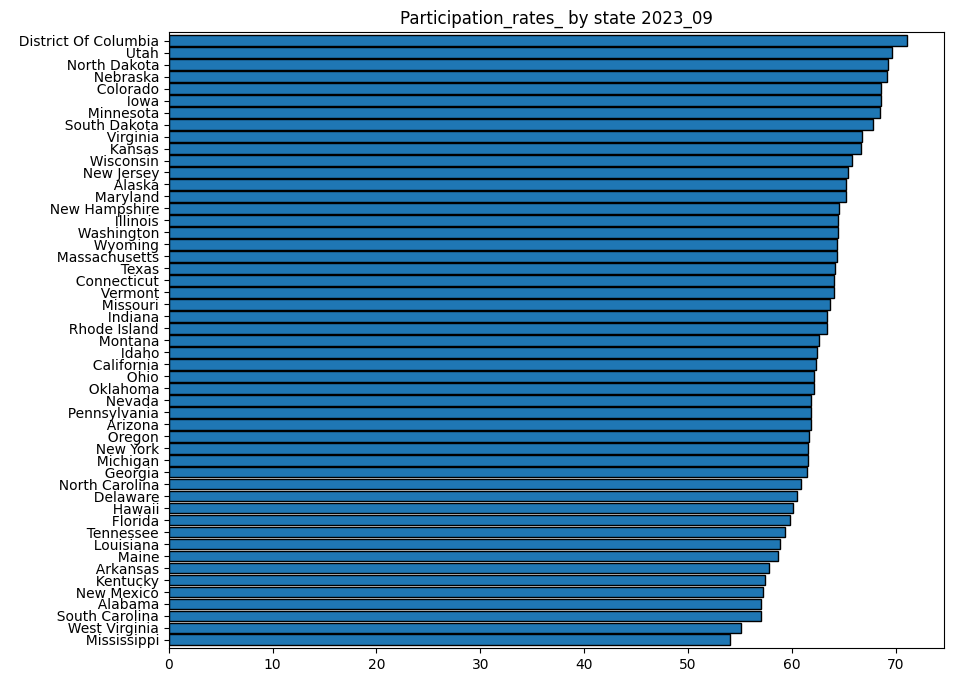

In [280]:
ax = part_states.loc[part_states.index == '2023-09-01'].T.sort_values('2023-09-01') \
.plot(kind = 'barh',  figsize = (10,8) , title = 'Participation_rates_ by state 2023_09' , width = .9 , edgecolor = 'black')
ax.legend().remove()